In [2]:
import os
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import seaborn as sns
%matplotlib inline
plt.style.use('ggplot')

In [3]:
# pip install tensorflow
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [4]:
import numpy as np

In [5]:
# Windows Install Cuda + cuDNN
# https://www.tensorflow.org/install/gpu?hl=es-419
# 
# Install Zlib
tf.config.experimental.list_physical_devices()

[PhysicalDevice(name='/physical_device:CPU:0', device_type='CPU'),
 PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

In [6]:
dir = os.getcwd()

In [7]:
os.listdir(dir)

['20220427trainingsplitlowres.ipynb',
 '20220429resnet152',
 '20220430torchmodels',
 'split_0',
 'split_1',
 'test.py']

In [8]:
os.listdir(dir +"/split_0/")

['Angiectasia',
 'Blood',
 'Erosion',
 'Erythematous',
 'Foreign Bodies',
 'Ileo-cecal valve',
 'Lymphangiectasia',
 'Normal',
 'Pylorus',
 'Reduced Mucosal View',
 'Ulcer']

In [9]:
os.listdir(dir +"/split_1/")

['Angiectasia',
 'Blood',
 'Erosion',
 'Erythematous',
 'Foreign Bodies',
 'Ileo-cecal valve',
 'Lymphangiectasia',
 'Normal',
 'Pylorus',
 'Reduced Mucosal View',
 'Ulcer']

In [10]:

def len_data(filename):
    Ileocecalvalve_data = os.listdir(filename+'/Ileo-cecal valve')
    ForeignBodies_data = os.listdir(filename+'/Foreign Bodies')
    Pylorus_data = os.listdir(filename+'/Pylorus')
    Erythematous_data = os.listdir(filename+'/Erythematous')
    Reducedmucosalview_data = os.listdir(filename+'/Reduced Mucosal View')
    Blood_data = os.listdir(filename+'/Blood')
    Normal_data = os.listdir(filename+'/Normal')
    Angiectasia_data = os.listdir(filename+'/Angiectasia')
    Lymphangiectasia_data = os.listdir(filename+'/Lymphangiectasia')
    Ulcer_data = os.listdir(filename+'/Ulcer')
    Erosion_data = os.listdir(filename+'/Erosion')
        
    value = []
    for data in [Ileocecalvalve_data,ForeignBodies_data,Pylorus_data,Erythematous_data,Reducedmucosalview_data,Blood_data,Normal_data,Angiectasia_data,Lymphangiectasia_data,Ulcer_data,Erosion_data]:
        value.append(len(data))
        
    return sum(value)


In [11]:
filename = dir +"/split_0"
print('Total Images in Training set : ' + str(len_data(filename)))

Total Images in Training set : 23061


In [12]:
filename = dir +"/split_1"
print('Total Images in Testing set : ' + str(len_data(filename)))

Total Images in Testing set : 24101


In [13]:
def plot_data(filename):
    Ileocecalvalve_data = os.listdir(filename+'/Ileo-cecal valve')
    ForeignBodies_data = os.listdir(filename+'/Foreign Bodies')
    Pylorus_data = os.listdir(filename+'/Pylorus')
    Erythematous_data = os.listdir(filename+'/Erythematous')
    Reducedmucosalview_data = os.listdir(filename+'/Reduced Mucosal View')
    Blood_data = os.listdir(filename+'/Blood')
    Normal_data = os.listdir(filename+'/Normal')
    Angiectasia_data = os.listdir(filename+'/Angiectasia')
    Lymphangiectasia_data = os.listdir(filename+'/Lymphangiectasia')
    Ulcer_data = os.listdir(filename+'/Ulcer')
    Erosion_data = os.listdir(filename+'/Erosion')
        
    value = []
    for data in [Ileocecalvalve_data,ForeignBodies_data,Pylorus_data,Erythematous_data,Reducedmucosalview_data,Blood_data,Normal_data,Angiectasia_data,Lymphangiectasia_data,Ulcer_data,Erosion_data]:
        value.append(len(data))
    
    sns.set(rc = {'figure.figsize':(15,8)})
    sns.barplot(['Ileoc','FBodies','Pylorus','Erythema','Reduced','Blood','Normal','Angiec','Lymphangie','Ulcer','Erosion'],value, palette = 'plasma')
    plt.title(filename.split('/')[1])



C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


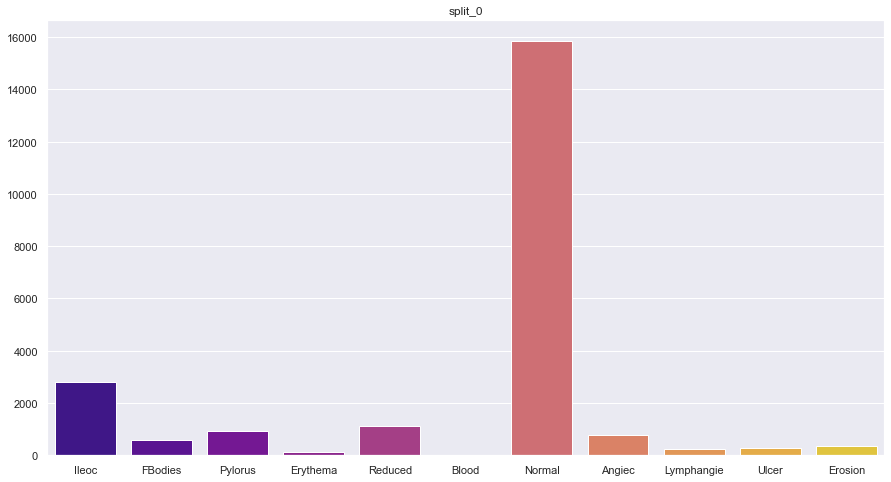

In [14]:
filename = dir +"/split_0/"
plot_data(filename)

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


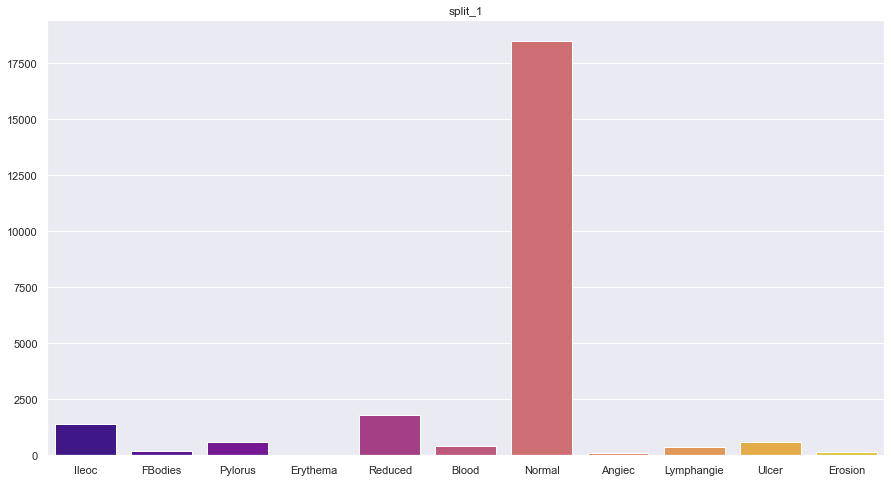

In [14]:
filename = dir +"/split_1"
plot_data(filename)

In [15]:
# pip install opencv-python
import cv2
import os

def load_images_from_folder(folder):
    images = []
    
    folder1 = folder + '/Ileo-cecal valve'
    for filename in os.listdir(folder1)[:5]:
        img = cv2.imread(os.path.join(os.getcwd(),folder1,filename))
        img = cv2.resize(img,(168,168))
        if img is not None:
            images.append(img)
            
    folder2 = folder + '/Foreign Bodies'
    for filename in os.listdir(folder2)[:5]:
        img = cv2.imread(os.path.join(os.getcwd(),folder2,filename))
        img = cv2.resize(img,(168,168))
        if img is not None:
            images.append(img)
    
    folder3 = folder + '/Pylorus'
    for filename in os.listdir(folder3)[:5]:
        img = cv2.imread(os.path.join(os.getcwd(),folder3,filename))
        img = cv2.resize(img,(168,168))
        if img is not None:
            images.append(img)
            
    folder4 = folder + '/Erythematous'
    for filename in os.listdir(folder4)[:5]:
        img = cv2.imread(os.path.join(os.getcwd(),folder4,filename))
        img = cv2.resize(img,(168,168))
        if img is not None:
            images.append(img)
            
    folder5 = folder + '/Reduced Mucosal View'
    for filename in os.listdir(folder5)[:5]:
        img = cv2.imread(os.path.join(os.getcwd(),folder5,filename))
        img = cv2.resize(img,(168,168))
        if img is not None:
            images.append(img)
    
    folder6 = folder + '/Blood'
    for filename in os.listdir(folder6)[:5]:
        img = cv2.imread(os.path.join(os.getcwd(),folder6,filename))
        img = cv2.resize(img,(168,168))
        if img is not None:
            images.append(img)
    
    folder7 = folder + '/Normal'
    for filename in os.listdir(folder7)[:5]:
        img = cv2.imread(os.path.join(os.getcwd(),folder7,filename))
        img = cv2.resize(img,(168,168))
        if img is not None:
            images.append(img)
    
    folder8 = folder + '/Angiectasia'
    for filename in os.listdir(folder8)[:5]:
        img = cv2.imread(os.path.join(os.getcwd(),folder8,filename))
        img = cv2.resize(img,(168,168))
        if img is not None:
            images.append(img)

    folder9 = folder + '/Lymphangiectasia'
    for filename in os.listdir(folder9)[:5]:
        img = cv2.imread(os.path.join(os.getcwd(),folder9,filename))
        img = cv2.resize(img,(168,168))
        if img is not None:
            images.append(img)
            
    folder10 = folder + '/Ulcer'
    for filename in os.listdir(folder10)[:5]:
        img = cv2.imread(os.path.join(os.getcwd(),folder10,filename))
        img = cv2.resize(img,(168,168))
        if img is not None:
            images.append(img)

    folder11 = folder + '/Erosion'
    for filename in os.listdir(folder11)[:5]:
        img = cv2.imread(os.path.join(os.getcwd(),folder11,filename))
        img = cv2.resize(img,(168,168))
        if img is not None:
            images.append(img)
    
    return images

In [16]:
images = load_images_from_folder('split_0/')

In [17]:
len(images)

55

In [18]:
(images[0]).shape

(168, 168, 3)

# Sample Images from training set

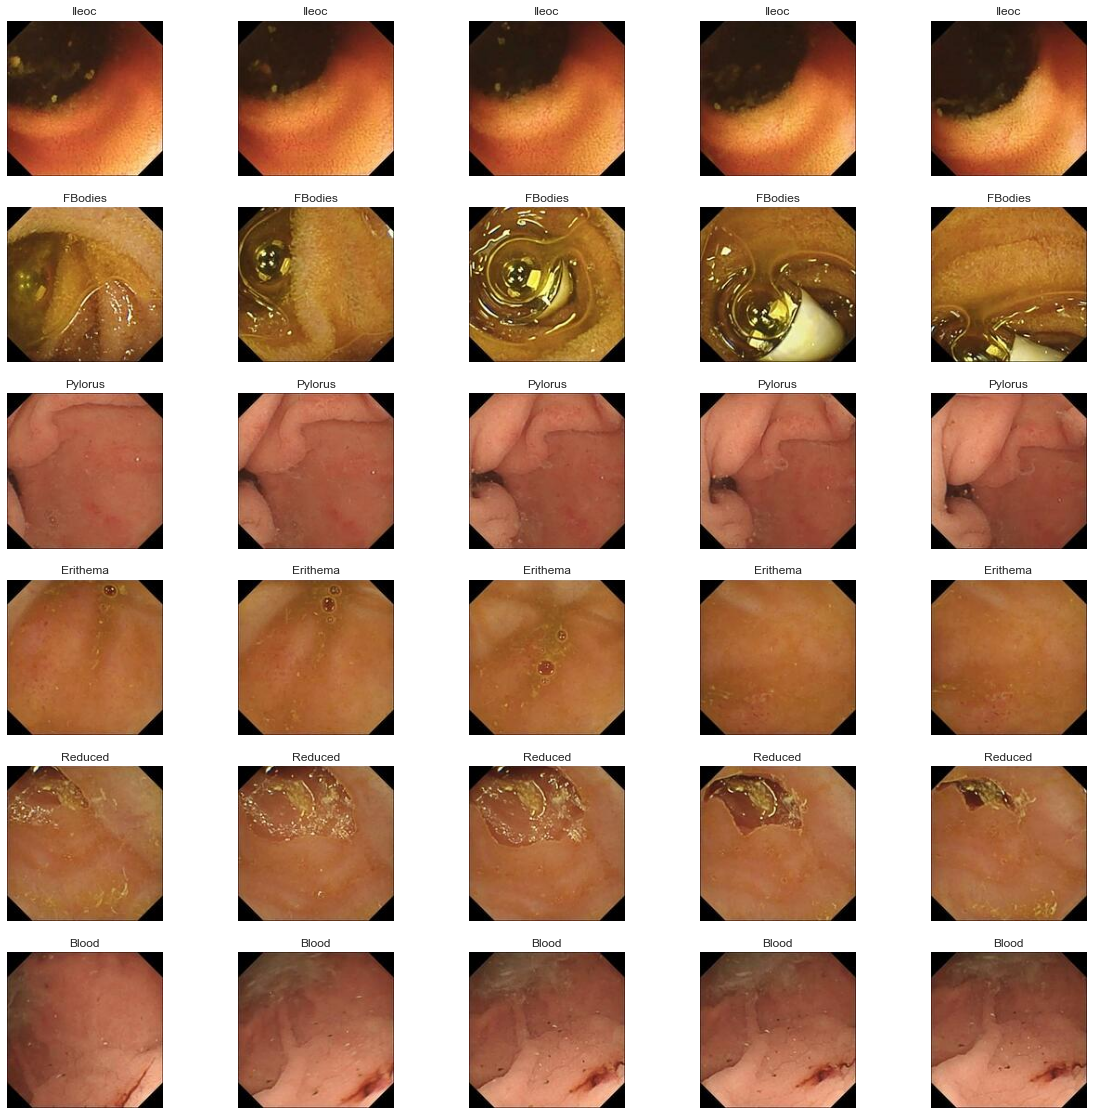

In [19]:
fig, axis = plt.subplots(6,5,figsize=(20,20))
count = 0
for i in range(0,6):
    for j in range(0,5):
        img_rgb = cv2.cvtColor(images[count], cv2.COLOR_BGR2RGB)
        axis[i,j].imshow(img_rgb)
        axis[i,j].axis('off')
        count = count + 1
        if i==0:
            axis[i,j].set_title('Ileoc')
        elif i==1:
            axis[i,j].set_title('FBodies')
        elif i==2:
            axis[i,j].set_title('Pylorus')
        elif i==3:
            axis[i,j].set_title('Erithema')
        elif i==4:
            axis[i,j].set_title('Reduced')
        elif i==5:
            axis[i,j].set_title('Blood')


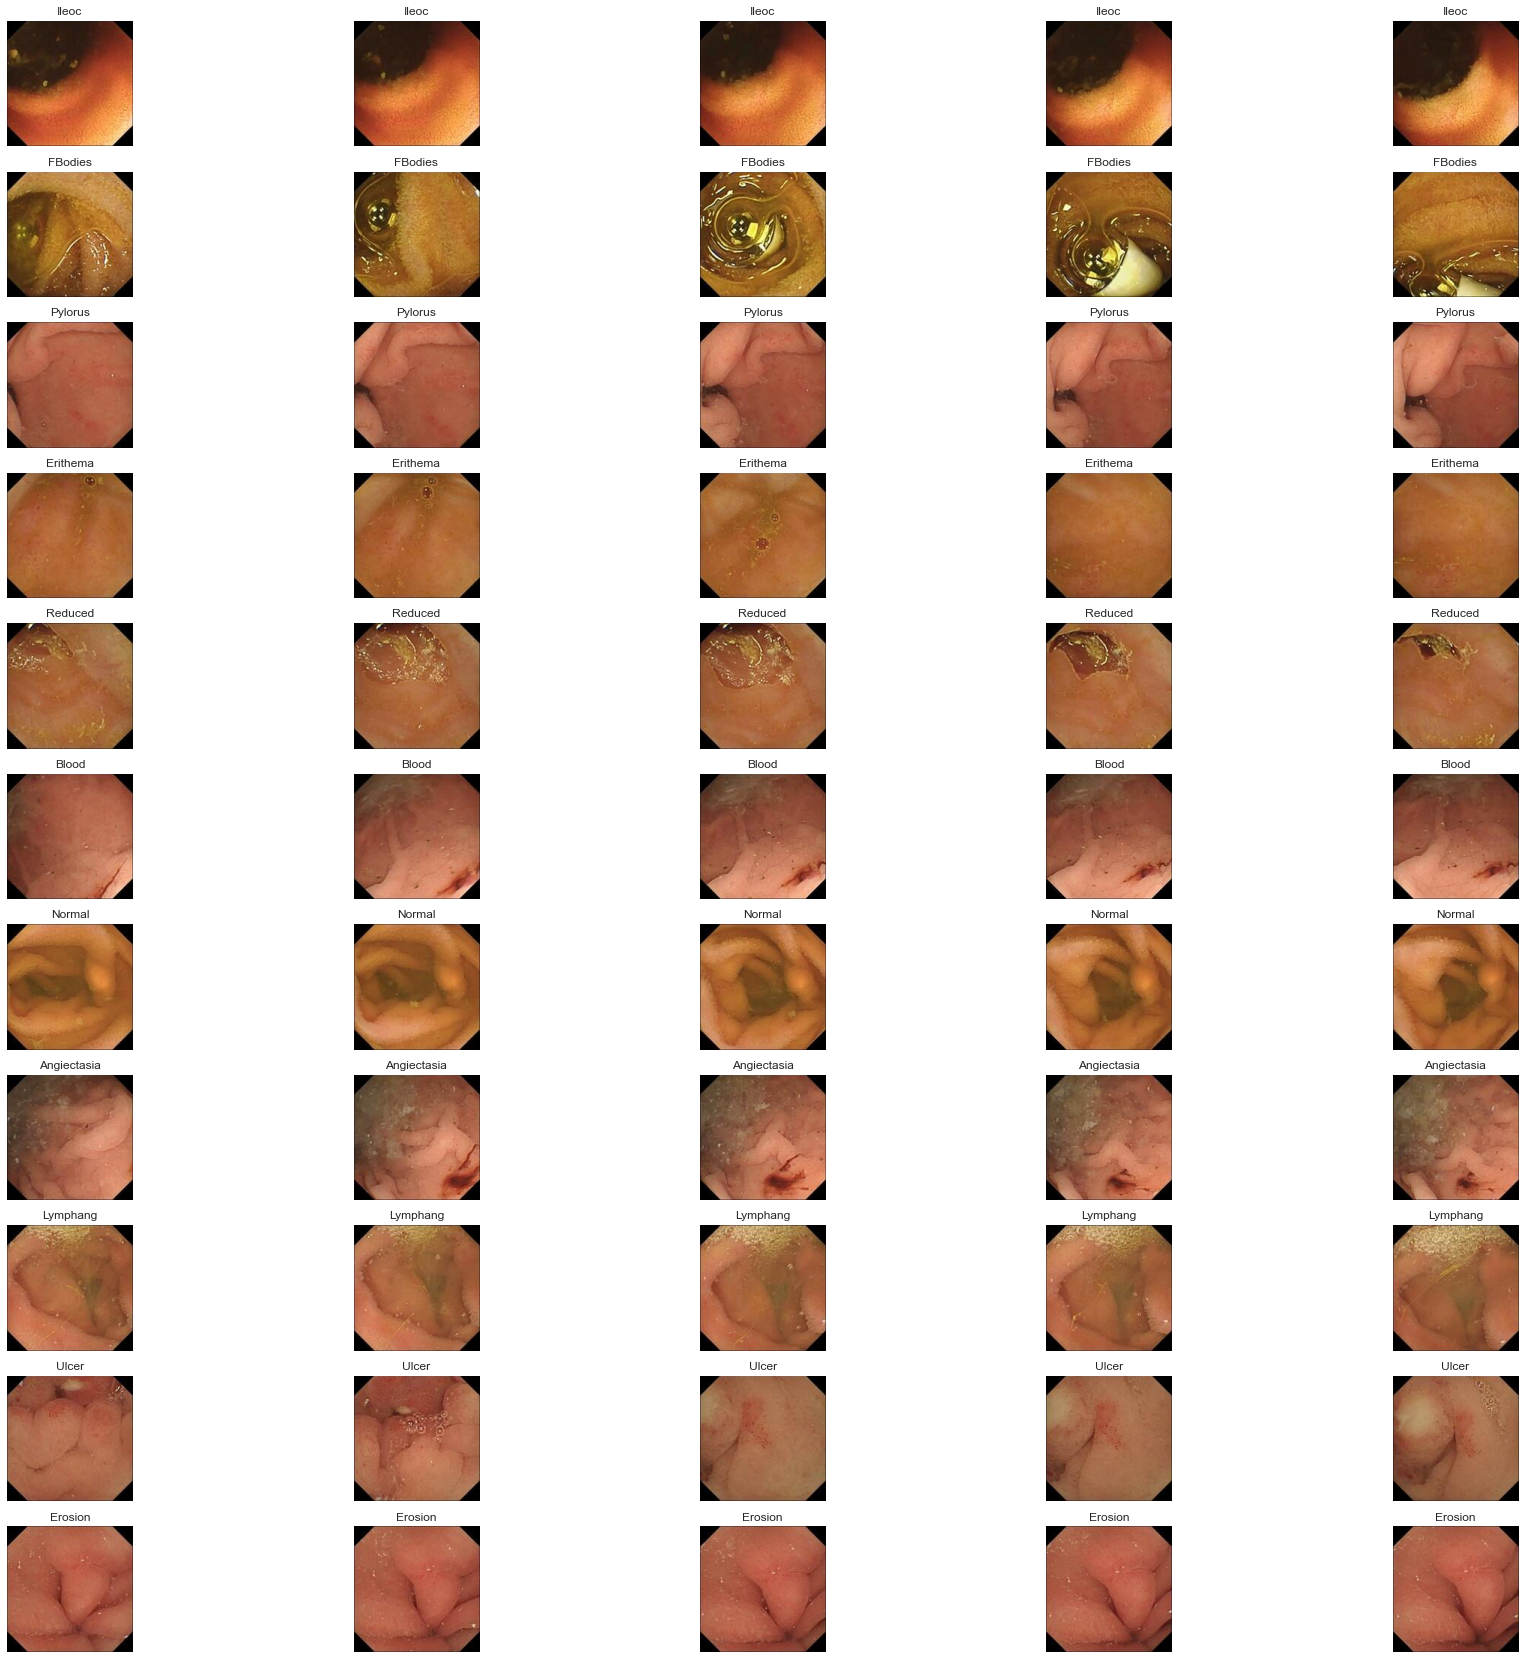

In [20]:
fig, axis = plt.subplots(11,5,figsize=(30,30))
#fig.set_figheight(30)
#fig.set_figwidth(30)
count = 0
for i in range(0,11):
    for j in range(0,5):
        img_rgb = cv2.cvtColor(images[count], cv2.COLOR_BGR2RGB)
        axis[i,j].imshow(img_rgb)
        axis[i,j].axis('off')
        count = count + 1
        if i==0:
            axis[i,j].set_title('Ileoc')
        elif i==1:
            axis[i,j].set_title('FBodies')
        elif i==2:
            axis[i,j].set_title('Pylorus')
        elif i==3:
            axis[i,j].set_title('Erithema')
        elif i==4:
            axis[i,j].set_title('Reduced')
        elif i==5:
            axis[i,j].set_title('Blood')
        elif i==6:
            axis[i,j].set_title('Normal')
        elif i==7:
            axis[i,j].set_title('Angiectasia')
        elif i==8:
            axis[i,j].set_title('Lymphang')
        elif i==9:
            axis[i,j].set_title('Ulcer')
        elif i==10:
            axis[i,j].set_title('Erosion')


# 1st Model ( With Image Augmentation )

In [21]:
#el train es el 0 i el test es el 1

In [22]:
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    zoom_range=0.2,
    shear_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
    )

In [23]:
TRAINING_DIR = dir +"/split_0/"
train_generator = train_datagen.flow_from_directory(TRAINING_DIR,
                                                    class_mode='categorical',
                                                    target_size=(168, 168))

Found 23061 images belonging to 11 classes.


In [24]:
# No need to augment validation set
validation_datagen = ImageDataGenerator(rescale=1./255)

In [25]:
VALIDATION_DIR = dir +"/split_1/"
validation_generator = validation_datagen.flow_from_directory(VALIDATION_DIR,
                                                              class_mode='categorical',
                                                              target_size=(168, 168))

Found 24100 images belonging to 11 classes.


In [26]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(168, 168, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(11, activation='softmax')
])

In [27]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 166, 166, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 83, 83, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 81, 81, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 40, 40, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 38, 38, 64)        36928     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 19, 19, 64)       0

In [28]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['acc'])

In [29]:

history = model.fit(train_generator,
                              epochs=5,
                              verbose=1,
                              validation_data=validation_generator)

Epoch 1/5


Error: Canceled future for execute_request message before replies were done

In [ ]:
# Ara el train es el 1 i el test es el 0

In [33]:
train_datagen1 = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    zoom_range=0.2,
    shear_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
    )

In [35]:
TRAINING_DIR1 = dir +"/split_1/"
train_generator1 = train_datagen1.flow_from_directory(TRAINING_DIR1,
                                                    class_mode='categorical',
                                                    target_size=(168, 168))

Found 24100 images belonging to 11 classes.


In [36]:
# No need to augment validation set
validation_datagen1 = ImageDataGenerator(rescale=1./255)

In [37]:
VALIDATION_DIR1 = dir +"/split_0/"
validation_generator1 = validation_datagen1.flow_from_directory(VALIDATION_DIR1,
                                                              class_mode='categorical',
                                                              target_size=(168, 168))

Found 23061 images belonging to 11 classes.


In [38]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(168, 168, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(11, activation='softmax')
])

In [39]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 166, 166, 32)      896       
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 83, 83, 32)       0         
 2D)                                                             
                                                                 
 conv2d_4 (Conv2D)           (None, 81, 81, 64)        18496     
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 40, 40, 64)       0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 38, 38, 64)        36928     
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 19, 19, 64)      

In [40]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['acc'])

In [41]:
history = model.fit_generator(train_generator1,
                              epochs=5,
                              verbose=1,
                              validation_data=validation_generator1)

Epoch 1/5


C:\Users\sergi\AppData\Local\Temp/ipykernel_20796/555893823.py:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = model.fit_generator(train_generator1,


711/754 [===========================>..] - ETA: 15s - loss: 0.7193 - acc: 0.7950

KeyboardInterrupt: 

# Transfer Learning


## 1) Inception V3

In [29]:
from tensorflow.keras.applications.inception_v3 import InceptionV3

In [30]:
pre_trained_model = InceptionV3(input_shape=(168,168,3), include_top=False,weights=None)

In [31]:
weights_file = os.getcwd()+'/inceptionv3weights/inception_v3_weights_tf_dim_ordering_tf_kernels_notop.h5'

In [32]:
pre_trained_model.load_weights(weights_file)

In [33]:
for layer in pre_trained_model.layers:  
    layer.trainable=False

### 1.1) Using 'mixed7' as last layer

In [34]:
last_layer = pre_trained_model.get_layer('mixed7')
print('last layer output shape: ', last_layer.output_shape)
last_output = last_layer.output

last layer output shape:  (None, 8, 8, 768)


In [35]:
from tensorflow.keras import layers
from tensorflow.keras import Model

x = layers.Flatten()(last_output)

x = layers.Dropout(0.2)(x)      

x = layers.Dense(512, activation='relu')(x)

x = layers.Dropout(0.2)(x)                  

x = layers.Dense(11, activation='softmax')(x)           

model = Model(pre_trained_model.input, x) 

model.compile(optimizer = 'adam', 
              loss = 'categorical_crossentropy', 
              metrics = ['acc'])

model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 168, 168, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv2d_3 (Conv2D)              (None, 83, 83, 32)   864         ['input_1[0][0]']                
                                                                                                  
 batch_normalization (BatchNorm  (None, 83, 83, 32)  96          ['conv2d_3[0][0]']               
 alization)                                                                                       
                                                                                              

 batch_normalization_10 (BatchN  (None, 18, 18, 96)  288         ['conv2d_13[0][0]']              
 ormalization)                                                                                    
                                                                                                  
 batch_normalization_11 (BatchN  (None, 18, 18, 32)  96          ['conv2d_14[0][0]']              
 ormalization)                                                                                    
                                                                                                  
 activation_5 (Activation)      (None, 18, 18, 64)   0           ['batch_normalization_5[0][0]']  
                                                                                                  
 activation_7 (Activation)      (None, 18, 18, 64)   0           ['batch_normalization_7[0][0]']  
                                                                                                  
 activatio

 conv2d_23 (Conv2D)             (None, 18, 18, 48)   13824       ['mixed1[0][0]']                 
                                                                                                  
 conv2d_26 (Conv2D)             (None, 18, 18, 96)   55296       ['activation_22[0][0]']          
                                                                                                  
 batch_normalization_20 (BatchN  (None, 18, 18, 48)  144         ['conv2d_23[0][0]']              
 ormalization)                                                                                    
                                                                                                  
 batch_normalization_23 (BatchN  (None, 18, 18, 96)  288         ['conv2d_26[0][0]']              
 ormalization)                                                                                    
                                                                                                  
 activatio

                                                                                                  
 conv2d_37 (Conv2D)             (None, 8, 8, 128)    98304       ['mixed3[0][0]']                 
                                                                                                  
 batch_normalization_34 (BatchN  (None, 8, 8, 128)   384         ['conv2d_37[0][0]']              
 ormalization)                                                                                    
                                                                                                  
 activation_34 (Activation)     (None, 8, 8, 128)    0           ['batch_normalization_34[0][0]'] 
                                                                                                  
 conv2d_38 (Conv2D)             (None, 8, 8, 128)    114688      ['activation_34[0][0]']          
                                                                                                  
 batch_nor

                                                                                                  
 activation_44 (Activation)     (None, 8, 8, 160)    0           ['batch_normalization_44[0][0]'] 
                                                                                                  
 conv2d_48 (Conv2D)             (None, 8, 8, 160)    179200      ['activation_44[0][0]']          
                                                                                                  
 batch_normalization_45 (BatchN  (None, 8, 8, 160)   480         ['conv2d_48[0][0]']              
 ormalization)                                                                                    
                                                                                                  
 activation_45 (Activation)     (None, 8, 8, 160)    0           ['batch_normalization_45[0][0]'] 
                                                                                                  
 conv2d_44

 batch_normalization_55 (BatchN  (None, 8, 8, 160)   480         ['conv2d_58[0][0]']              
 ormalization)                                                                                    
                                                                                                  
 activation_55 (Activation)     (None, 8, 8, 160)    0           ['batch_normalization_55[0][0]'] 
                                                                                                  
 conv2d_54 (Conv2D)             (None, 8, 8, 160)    122880      ['mixed5[0][0]']                 
                                                                                                  
 conv2d_59 (Conv2D)             (None, 8, 8, 160)    179200      ['activation_55[0][0]']          
                                                                                                  
 batch_normalization_51 (BatchN  (None, 8, 8, 160)   480         ['conv2d_54[0][0]']              
 ormalizat

 conv2d_64 (Conv2D)             (None, 8, 8, 192)    147456      ['mixed6[0][0]']                 
                                                                                                  
 conv2d_69 (Conv2D)             (None, 8, 8, 192)    258048      ['activation_65[0][0]']          
                                                                                                  
 batch_normalization_61 (BatchN  (None, 8, 8, 192)   576         ['conv2d_64[0][0]']              
 ormalization)                                                                                    
                                                                                                  
 batch_normalization_66 (BatchN  (None, 8, 8, 192)   576         ['conv2d_69[0][0]']              
 ormalization)                                                                                    
                                                                                                  
 activatio

In [36]:
history_inception = model.fit_generator(train_generator,
                              epochs=5,
                              verbose=1,
                              validation_data=validation_generator)

/tmp/ipykernel_2004/2716402589.py:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history_inception = model.fit_generator(train_generator,


Epoch 1/5


2022-04-27 19:22:02.664952: I tensorflow/stream_executor/cuda/cuda_dnn.cc:368] Loaded cuDNN version 8400


721/721 [==============================] - 238s 321ms/step - loss: 0.7345 - acc: 0.8014 - val_loss: 1.3126 - val_acc: 0.7381
Epoch 2/5
721/721 [==============================] - 226s 314ms/step - loss: 0.4702 - acc: 0.8553 - val_loss: 1.3637 - val_acc: 0.7620
Epoch 3/5
721/721 [==============================] - 229s 317ms/step - loss: 0.4111 - acc: 0.8712 - val_loss: 1.6552 - val_acc: 0.7606
Epoch 4/5
721/721 [==============================] - 226s 313ms/step - loss: 0.3664 - acc: 0.8845 - val_loss: 1.6677 - val_acc: 0.7333
Epoch 5/5
721/721 [==============================] - 227s 314ms/step - loss: 0.3467 - acc: 0.8912 - val_loss: 1.5328 - val_acc: 0.7534


 Validation Accuracy of **75,34%**

In [134]:
acc = history_inception.history['acc']
val_acc = history_inception.history['val_acc']   
loss = history_inception.history['loss']
val_loss = history_inception.history['val_loss']
epochs = history_inception.epoch

Text(0, 0.5, 'Accuracy')

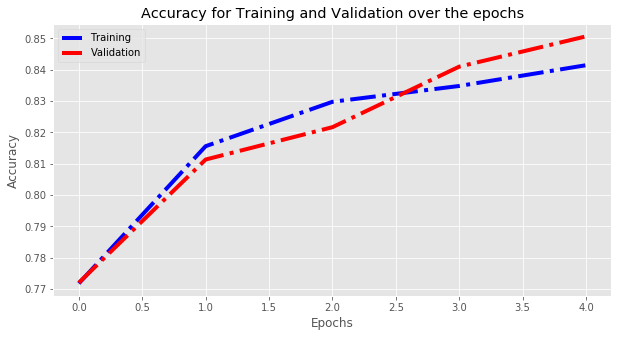

In [83]:
plt.figure(figsize=(10,5),frameon=False)
plt.plot(epochs,acc,c='b',ls='-.',lw='4',label='Training')
plt.plot(epochs,val_acc,c='r',ls='-.',lw='4',label='Validation')
plt.legend()
plt.title('Accuracy for Training and Validation over the epochs')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')

Text(0, 0.5, 'Loss')

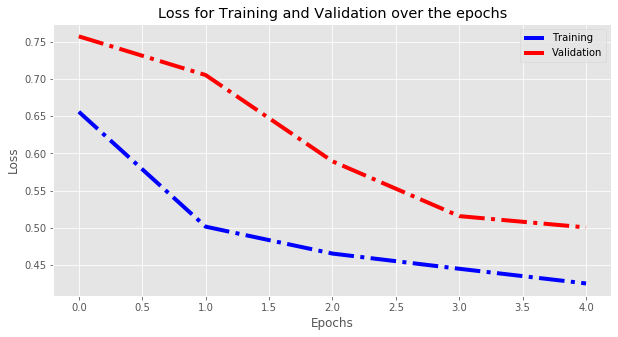

In [84]:
plt.figure(figsize=(10,5))
plt.plot(epochs,loss,c='b',ls='-.',lw='4',label='Training')
plt.plot(epochs,val_loss,c='r',ls='-.',lw='4',label='Validation')
plt.legend()
plt.title('Loss for Training and Validation over the epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')

### 1.1) Using 'mixed8' as last layer

In [20]:
last_layer = pre_trained_model.get_layer('mixed8')
print('last layer output shape: ', last_layer.output_shape)
last_output = last_layer.output

last layer output shape:  (None, 3, 3, 1280)


In [23]:
x = layers.Flatten()(last_output)

x = layers.Dropout(0.4)(x)      

x = layers.Dense(256, activation='relu')(x)

x = layers.Dropout(0.2)(x)                  

x = layers.Dense(11, activation='softmax')(x)           

model = Model(pre_trained_model.input, x) 

model.compile(optimizer = 'adam', 
              loss = 'categorical_crossentropy', 
              metrics = ['acc'])


In [67]:
history1 = model.fit_generator(train_generator,
                              epochs=1,
                              verbose=1,
                              validation_data=validation_generator)

439/439 [==============================] - 2893s 7s/step - loss: 0.6843 - acc: 0.7480 - val_loss: 0.6091 - val_acc: 0.7747


 Validation Accuracy of **77.47%**

## 2) ResNet50

In [43]:
from tensorflow.keras.applications.resnet50 import ResNet50

In [44]:
pre_trained_model = ResNet50(input_shape=(168,168,3),include_top =False, weights= 'imagenet')

In [39]:
for layer in pre_trained_model.layers:  
    layer.trainable=False

In [40]:
last_layer = pre_trained_model.get_layer('conv4_block6_out')
print('last layer output shape: ', last_layer.output_shape)
last_output = last_layer.output

last layer output shape:  (None, 11, 11, 1024)


In [41]:
x = layers.Flatten()(last_output)

x = layers.Dropout(0.4)(x)      

x = layers.Dense(256, activation='relu')(x)

x = layers.Dropout(0.2)(x)                  

x = layers.Dense(11, activation='softmax')(x)           

model = Model(pre_trained_model.input, x) 

model.compile(optimizer = 'adam', 
              loss = 'categorical_crossentropy', 
              metrics = ['acc'])

model.summary()

Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_2 (InputLayer)           [(None, 168, 168, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv1_pad (ZeroPadding2D)      (None, 174, 174, 3)  0           ['input_2[0][0]']                
                                                                                                  
 conv1_conv (Conv2D)            (None, 84, 84, 64)   9472        ['conv1_pad[0][0]']              
                                                                                                  
 conv1_bn (BatchNormalization)  (None, 84, 84, 64)   256         ['conv1_conv[0][0]']       

 conv2_block3_2_conv (Conv2D)   (None, 42, 42, 64)   36928       ['conv2_block3_1_relu[0][0]']    
                                                                                                  
 conv2_block3_2_bn (BatchNormal  (None, 42, 42, 64)  256         ['conv2_block3_2_conv[0][0]']    
 ization)                                                                                         
                                                                                                  
 conv2_block3_2_relu (Activatio  (None, 42, 42, 64)  0           ['conv2_block3_2_bn[0][0]']      
 n)                                                                                               
                                                                                                  
 conv2_block3_3_conv (Conv2D)   (None, 42, 42, 256)  16640       ['conv2_block3_2_relu[0][0]']    
                                                                                                  
 conv2_blo

 conv3_block3_2_conv (Conv2D)   (None, 21, 21, 128)  147584      ['conv3_block3_1_relu[0][0]']    
                                                                                                  
 conv3_block3_2_bn (BatchNormal  (None, 21, 21, 128)  512        ['conv3_block3_2_conv[0][0]']    
 ization)                                                                                         
                                                                                                  
 conv3_block3_2_relu (Activatio  (None, 21, 21, 128)  0          ['conv3_block3_2_bn[0][0]']      
 n)                                                                                               
                                                                                                  
 conv3_block3_3_conv (Conv2D)   (None, 21, 21, 512)  66048       ['conv3_block3_2_relu[0][0]']    
                                                                                                  
 conv3_blo

 conv4_block2_1_relu (Activatio  (None, 11, 11, 256)  0          ['conv4_block2_1_bn[0][0]']      
 n)                                                                                               
                                                                                                  
 conv4_block2_2_conv (Conv2D)   (None, 11, 11, 256)  590080      ['conv4_block2_1_relu[0][0]']    
                                                                                                  
 conv4_block2_2_bn (BatchNormal  (None, 11, 11, 256)  1024       ['conv4_block2_2_conv[0][0]']    
 ization)                                                                                         
                                                                                                  
 conv4_block2_2_relu (Activatio  (None, 11, 11, 256)  0          ['conv4_block2_2_bn[0][0]']      
 n)                                                                                               
          

                                                                                                  
 conv4_block5_1_relu (Activatio  (None, 11, 11, 256)  0          ['conv4_block5_1_bn[0][0]']      
 n)                                                                                               
                                                                                                  
 conv4_block5_2_conv (Conv2D)   (None, 11, 11, 256)  590080      ['conv4_block5_1_relu[0][0]']    
                                                                                                  
 conv4_block5_2_bn (BatchNormal  (None, 11, 11, 256)  1024       ['conv4_block5_2_conv[0][0]']    
 ization)                                                                                         
                                                                                                  
 conv4_block5_2_relu (Activatio  (None, 11, 11, 256)  0          ['conv4_block5_2_bn[0][0]']      
 n)       

In [42]:
history_resnet = model.fit_generator(train_generator,
                              epochs=5,
                              verbose=1,
                              validation_data=validation_generator)

/tmp/ipykernel_2004/2658740047.py:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history_resnet = model.fit_generator(train_generator,


Epoch 1/5
721/721 [==============================] - 280s 384ms/step - loss: 4.1153 - acc: 0.6728 - val_loss: 1.1281 - val_acc: 0.7670
Epoch 2/5
721/721 [==============================] - 274s 380ms/step - loss: 1.3352 - acc: 0.6874 - val_loss: 1.1296 - val_acc: 0.7670
Epoch 3/5
721/721 [==============================] - 287s 398ms/step - loss: 1.2663 - acc: 0.6874 - val_loss: 1.0881 - val_acc: 0.7670
Epoch 4/5
721/721 [==============================] - 285s 395ms/step - loss: 1.2338 - acc: 0.6874 - val_loss: 1.1313 - val_acc: 0.7670
Epoch 5/5
721/721 [==============================] - 285s 395ms/step - loss: 1.2261 - acc: 0.6874 - val_loss: 1.0838 - val_acc: 0.7670


# Predicting Real images

We will use the **InceptionV3** model as it gave the best results(**85%**)

In [ ]:
history_inception.model.save('Final Model.h5')

In [ ]:
import cv2

model_pred = tf.keras.models.load_model('Final Model.h5')

In [112]:
model_pred.compile(loss='categorical_crossentropy',
             optimizer='adam',
                metrics=['accuracy'])

class_names = ['Building','Forest','Galcier','Mountain','Sea','Street']

In [136]:
def image_prediction(filename):
    img = cv2.imread(filename)
    imgPlot = img
    plt.imshow(imgPlot[...,::-1])
    plt.axis('off')
    img = cv2.resize(img,(150,150))
    img = np.reshape(img,[1,150,150,3])
    img = img.astype('float64')
    img = img / 255.0
    pred = model_pred.predict(img)
    name = class_names[np.argmax(pred)]
    plt.title('This is predicted as ' + name,size=20)

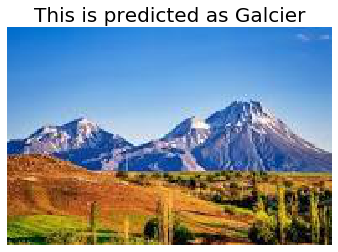

In [137]:
image_prediction('mountain.jpg')

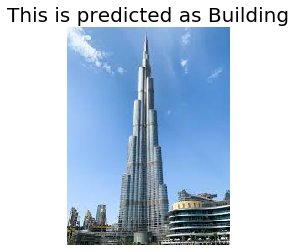

In [138]:
image_prediction('burj kahlifa.jpg')

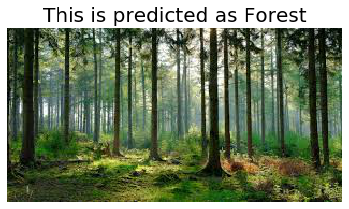

In [139]:
image_prediction('forest.jpg')

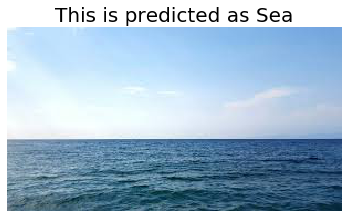

In [140]:
image_prediction('sea.jpg')

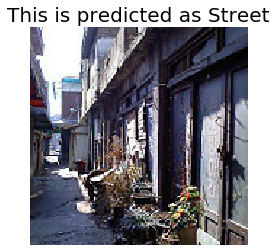

In [141]:
image_prediction('20152.jpg')

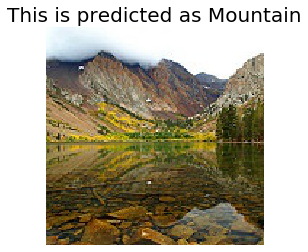

In [142]:
image_prediction('20438.jpg')

This is the image outside my house...


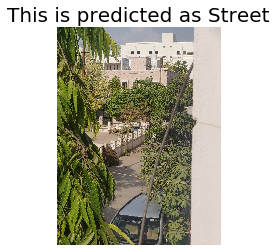

In [143]:
image_prediction('IMG_20200518_163037.jpg')
print("This is the image outside my house...")

It predicted **Right!**

### As you can see our model performs quite well for real world images